In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import os
from cellpose import io
from liams_funcs import *
from features import *

import pandas as pd

In [2]:
control_dir = '../control_images/'
drug_dir = '../drug_images/'

control_fnames = [control_dir + fname for fname in os.listdir(control_dir)]
drug_fnames = [drug_dir + fname for fname in os.listdir(drug_dir)]

In [3]:
fname1 = '../control_images/001_z26.png'
fname2 = '../drug_images/011_z57.png'

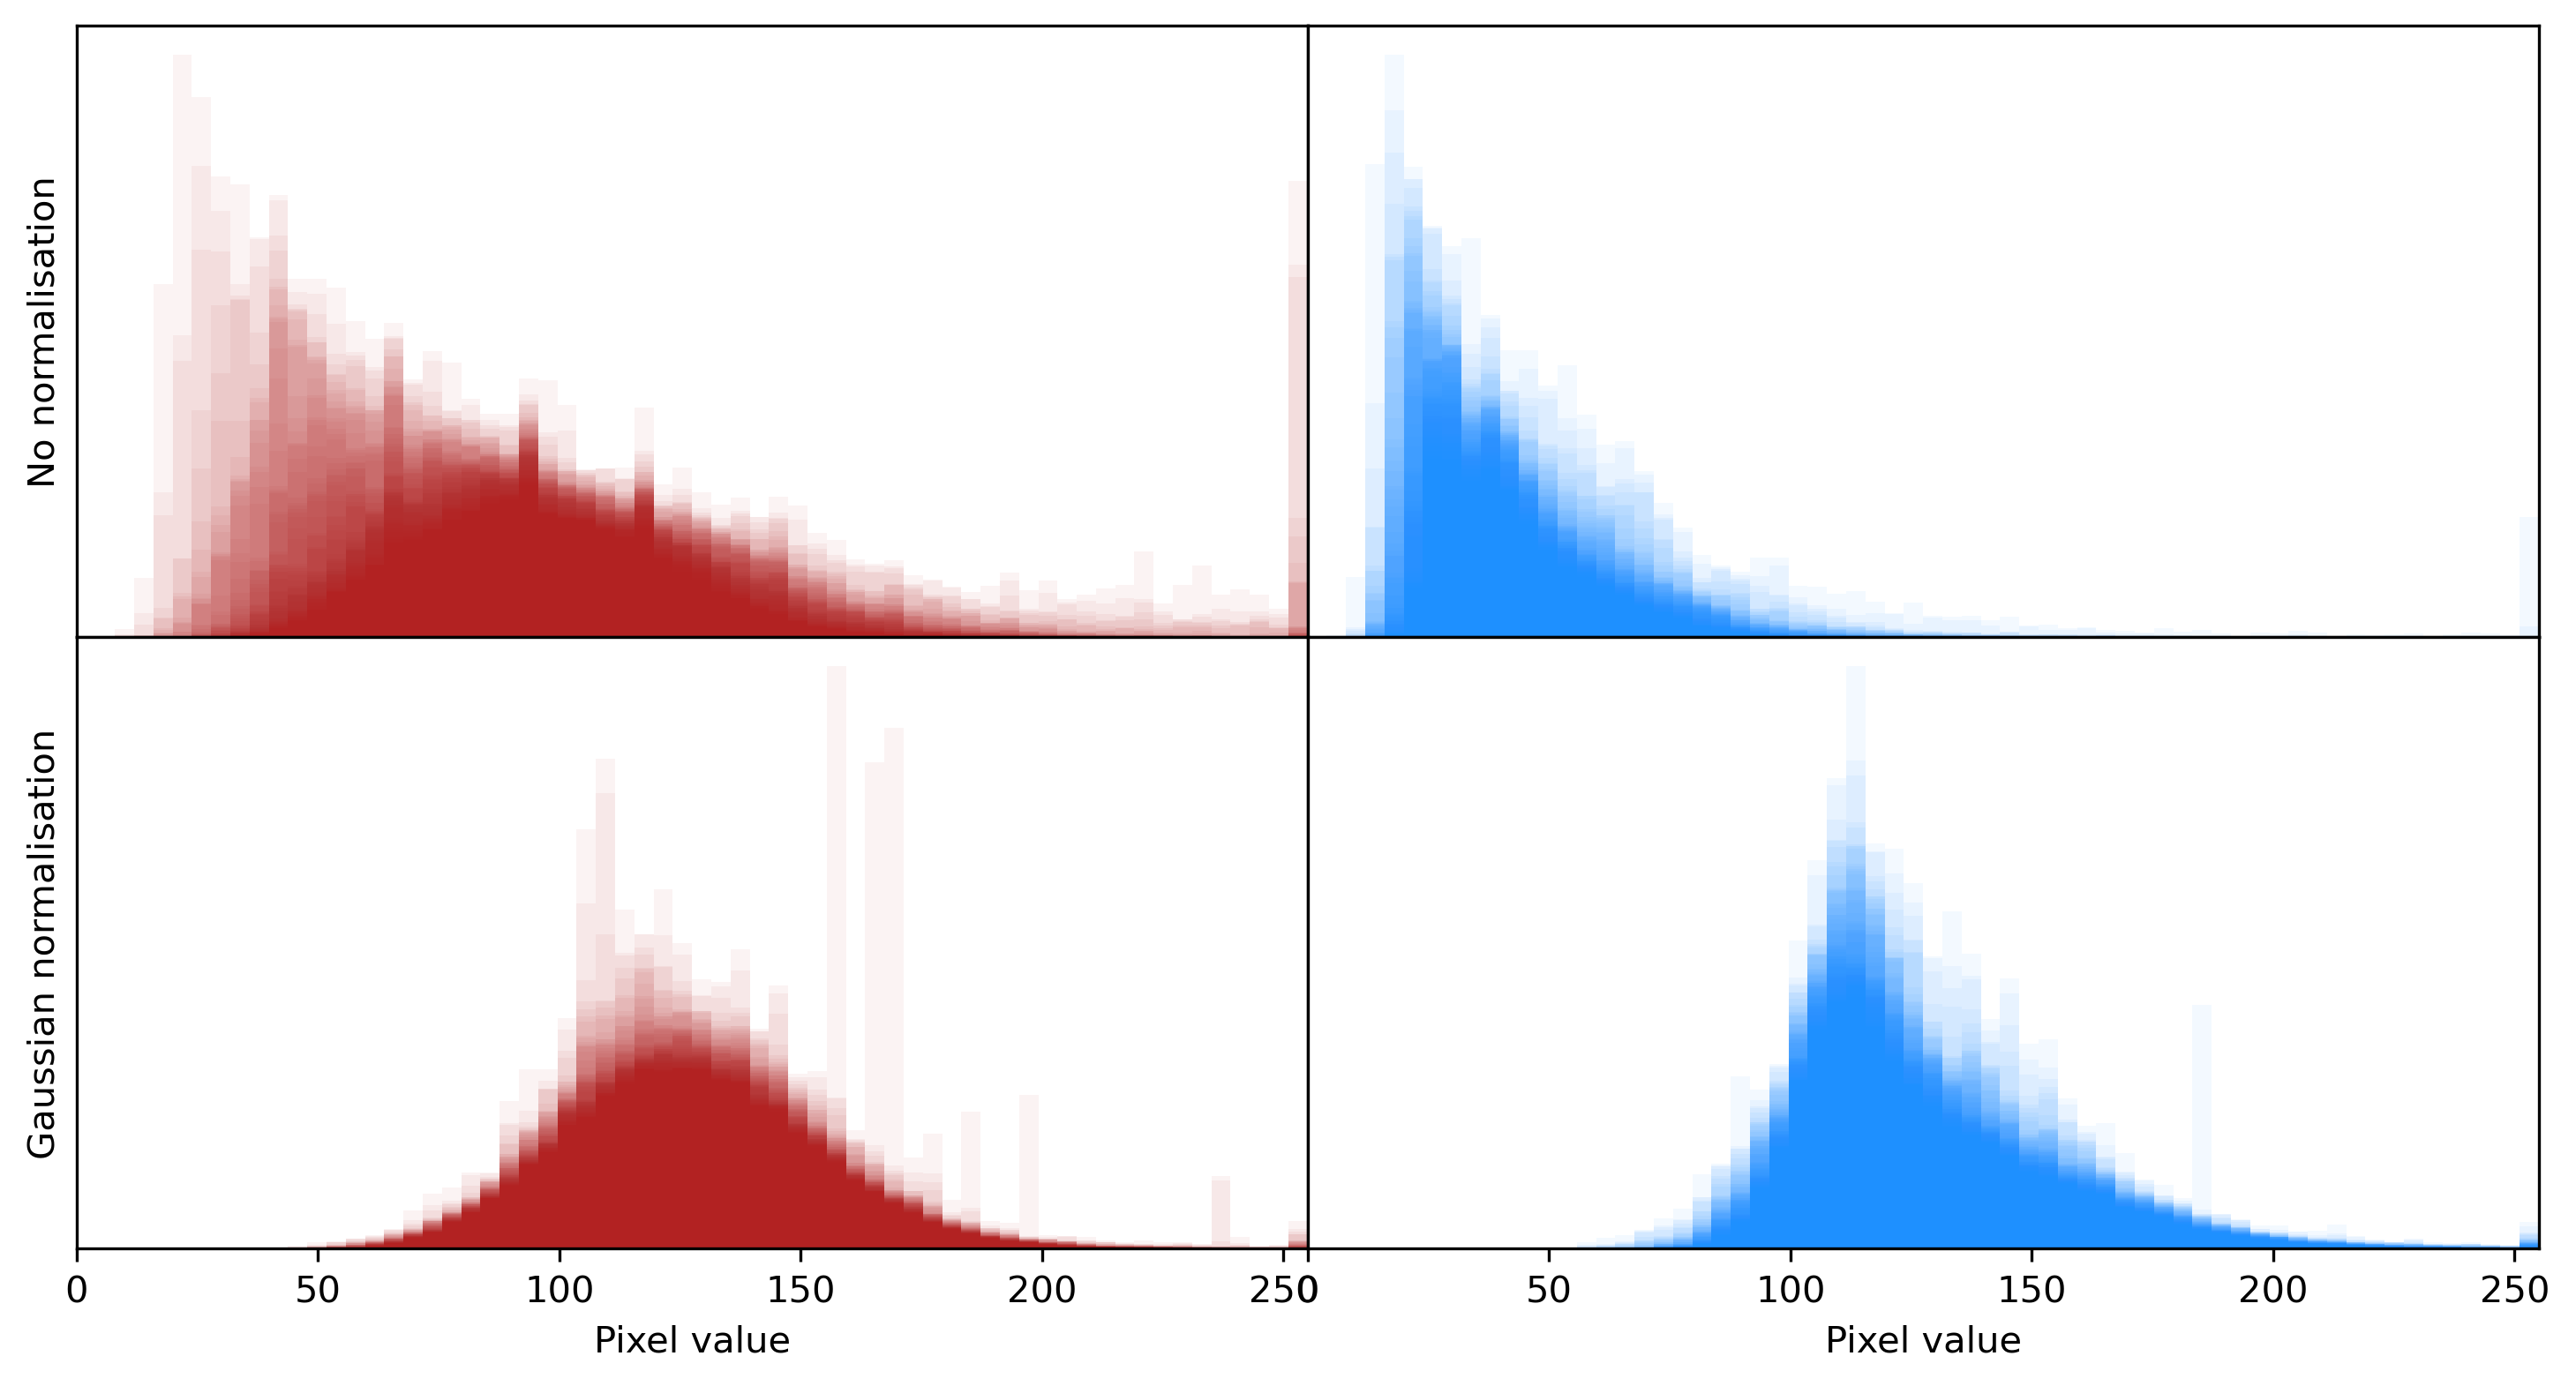

In [18]:
data = np.load('../segments/control/001_z26.png.npy')
image = io.imread('../control_images/001_z26.png')

reds, blues = image[:,:,0], image[:,:,2]
combined_cells, combined_nuclei = data[:,:,0], data[:,:,1]

vals = get_mask_levels(combined_nuclei)
fig, axes = plt.subplots(2, 2, figsize=(12, 6), dpi=300)
plt.subplots_adjust(wspace=0, hspace=0)

for val in vals:
    mask = (combined_nuclei == val)
    red = reds[mask]
    blue = blues[mask]

    counts_red, edges = np.histogram(red, bins=64, range=(0,255), density=True)
    counts_blue, _ = np.histogram(blue, bins=64, range=(0,255), density=True)

    axes[0,0].stairs(counts_red, edges, fill=True, alpha=0.05, color='firebrick')
    axes[0,1].stairs(counts_blue, edges, fill=True, alpha=0.05, color='dodgerblue')

    counts_red, edges = np.histogram(ZtoRGB(gaussian_normalisation(red)), bins=64, range=(0, 255), density=True)
    counts_blue, _= np.histogram(ZtoRGB(gaussian_normalisation(blue)), bins=64, range=(0, 255), density=True)

    axes[1,0].stairs(counts_red, edges, fill=True, alpha=0.05, color='firebrick')
    axes[1,1].stairs(counts_blue, edges, fill=True, alpha=0.05, color='dodgerblue')

for ax in axes.flatten():
    ax.set_ylim(0)
    ax.set_xlim(0, 255)
    ax.tick_params(left=False, labelleft=False)
for ax in axes[0,:]:
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

axes[0,0].set_ylabel('No normalisation'); axes[1,0].set_ylabel('Gaussian normalisation')
axes[1,0].set_xlabel('Pixel value'); axes[1,1].set_xlabel('Pixel value')

plt.savefig('../figures/spectrum_normalisations_control.png', dpi=300, bbox_inches='tight')
plt.show()

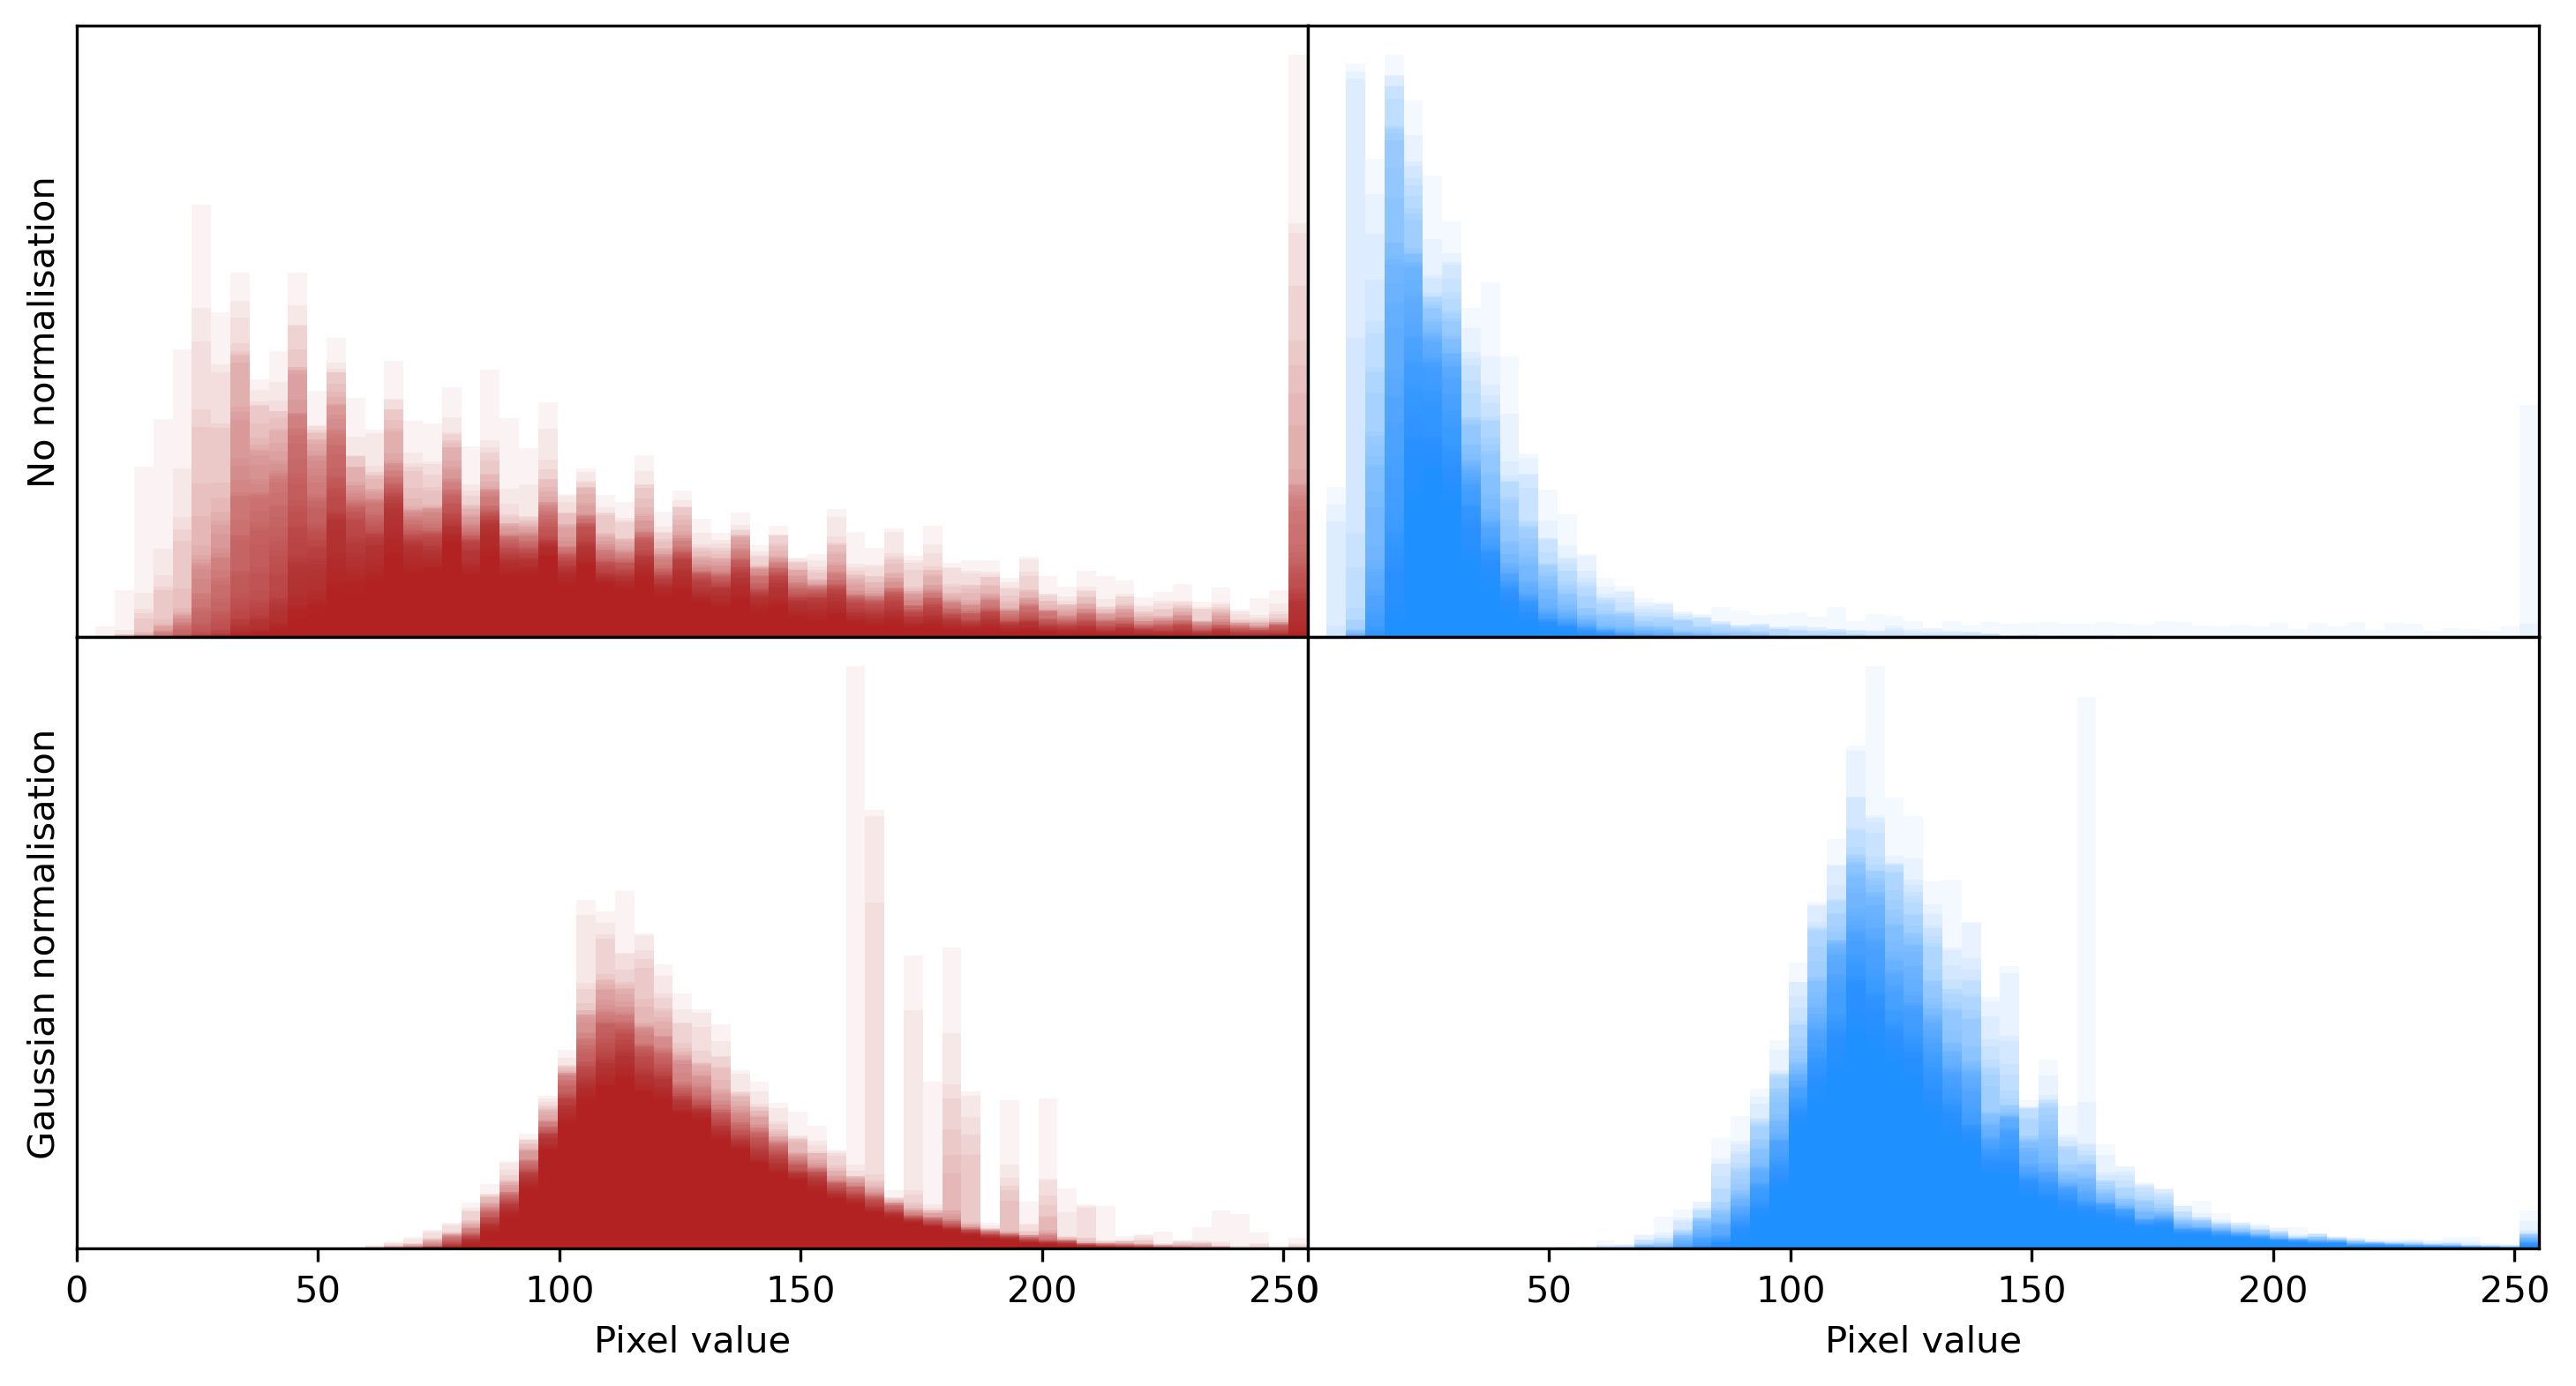

In [19]:
data = np.load('../segments/drug/011_z57.png.npy')
image = io.imread('../drug_images/011_z57.png')

reds, blues = image[:,:,0], image[:,:,2]
combined_cells, combined_nuclei = data[:,:,0], data[:,:,1]

vals = get_mask_levels(combined_nuclei)
fig, axes = plt.subplots(2, 2, figsize=(12, 6), dpi=300)
plt.subplots_adjust(wspace=0, hspace=0)

for val in vals:
    mask = (combined_nuclei == val)
    red = reds[mask]
    blue = blues[mask]

    counts_red, edges = np.histogram(red, bins=64, range=(0,255), density=True)
    counts_blue, _ = np.histogram(blue, bins=64, range=(0,255), density=True)

    axes[0,0].stairs(counts_red, edges, fill=True, alpha=0.05, color='firebrick')
    axes[0,1].stairs(counts_blue, edges, fill=True, alpha=0.05, color='dodgerblue')

    counts_red, edges = np.histogram(ZtoRGB(gaussian_normalisation(red)), bins=64, range=(0, 255), density=True)
    counts_blue, _= np.histogram(ZtoRGB(gaussian_normalisation(blue)), bins=64, range=(0, 255), density=True)

    axes[1,0].stairs(counts_red, edges, fill=True, alpha=0.05, color='firebrick')
    axes[1,1].stairs(counts_blue, edges, fill=True, alpha=0.05, color='dodgerblue')

for ax in axes.flatten():
    ax.set_ylim(0)
    ax.set_xlim(0, 255)
    ax.tick_params(left=False, labelleft=False)
for ax in axes[0,:]:
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

axes[0,0].set_ylabel('No normalisation'); axes[1,0].set_ylabel('Gaussian normalisation')
axes[1,0].set_xlabel('Pixel value'); axes[1,1].set_xlabel('Pixel value')

plt.savefig('../figures/spectrum_normalisations_drug.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
ds = Dataset(control_fnames, drug_fnames, bq=0.25)

Instantiating masks...


20it [03:47, 11.39s/it]


Retrieving features...


100%|██████████| 20/20 [00:36<00:00,  1.84s/it]


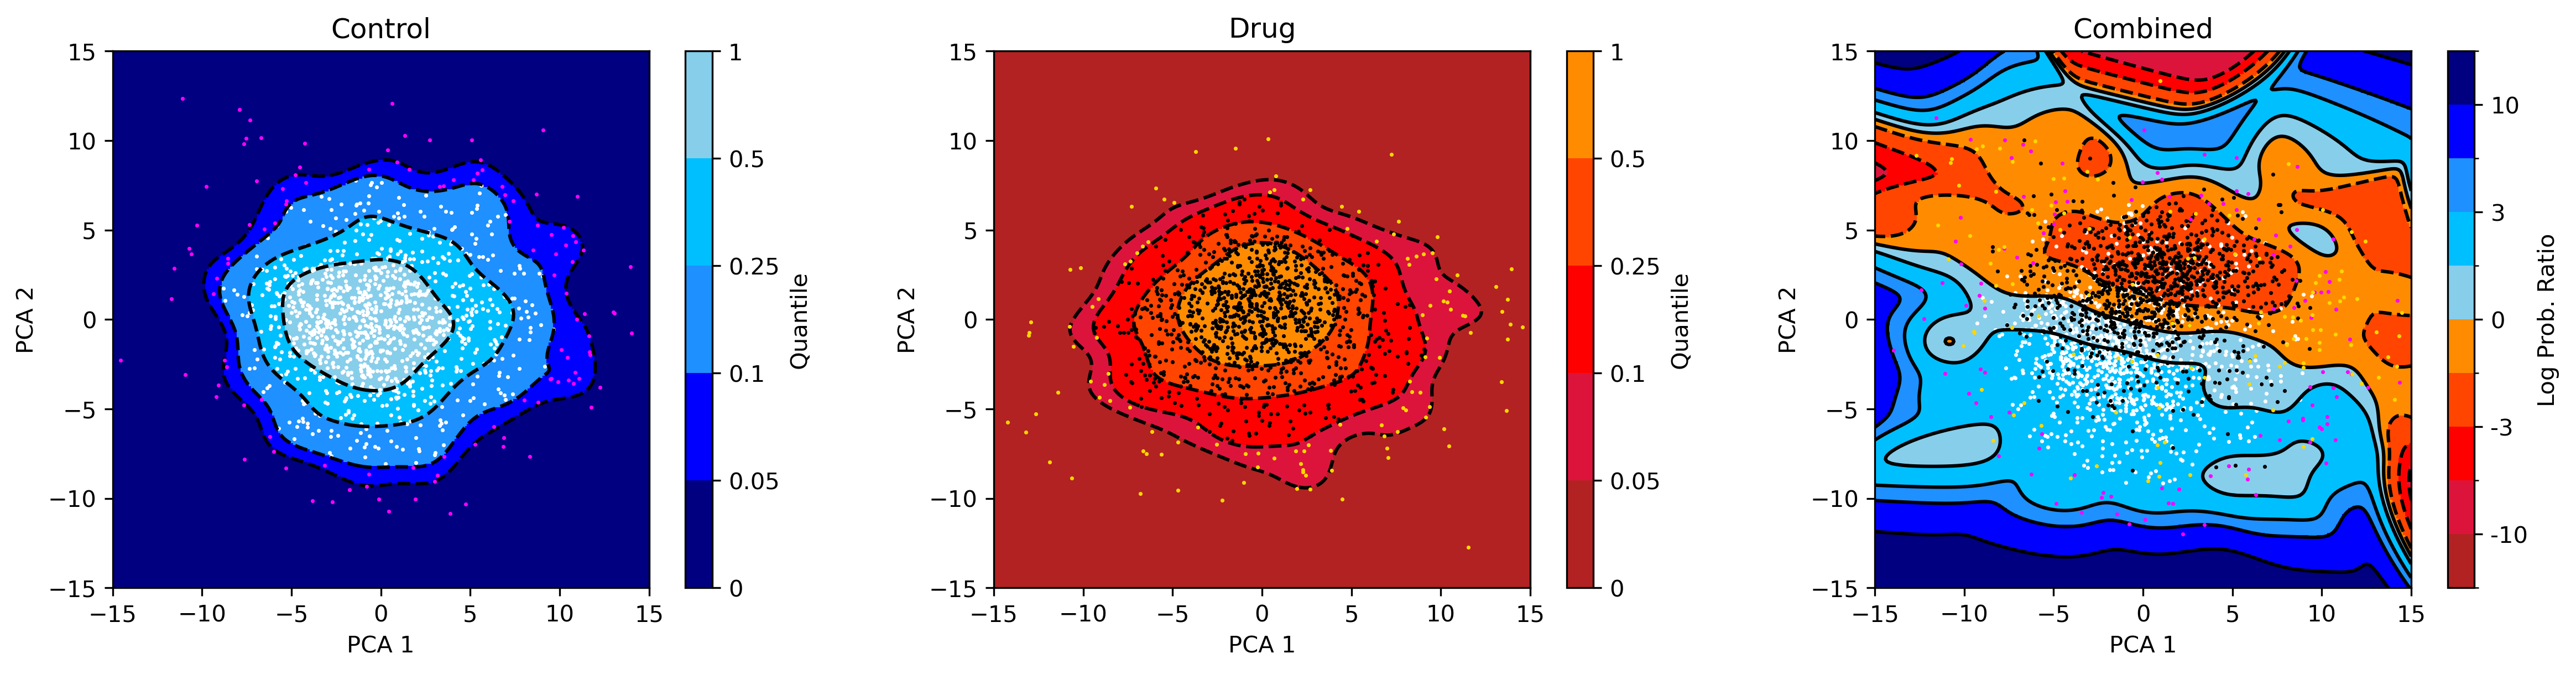

In [5]:
ds.performDimReduction()
ds.makeKDE(show_plot=True, save_to='../figures/cluster_analysis', resolution=256, threshold=0.1)

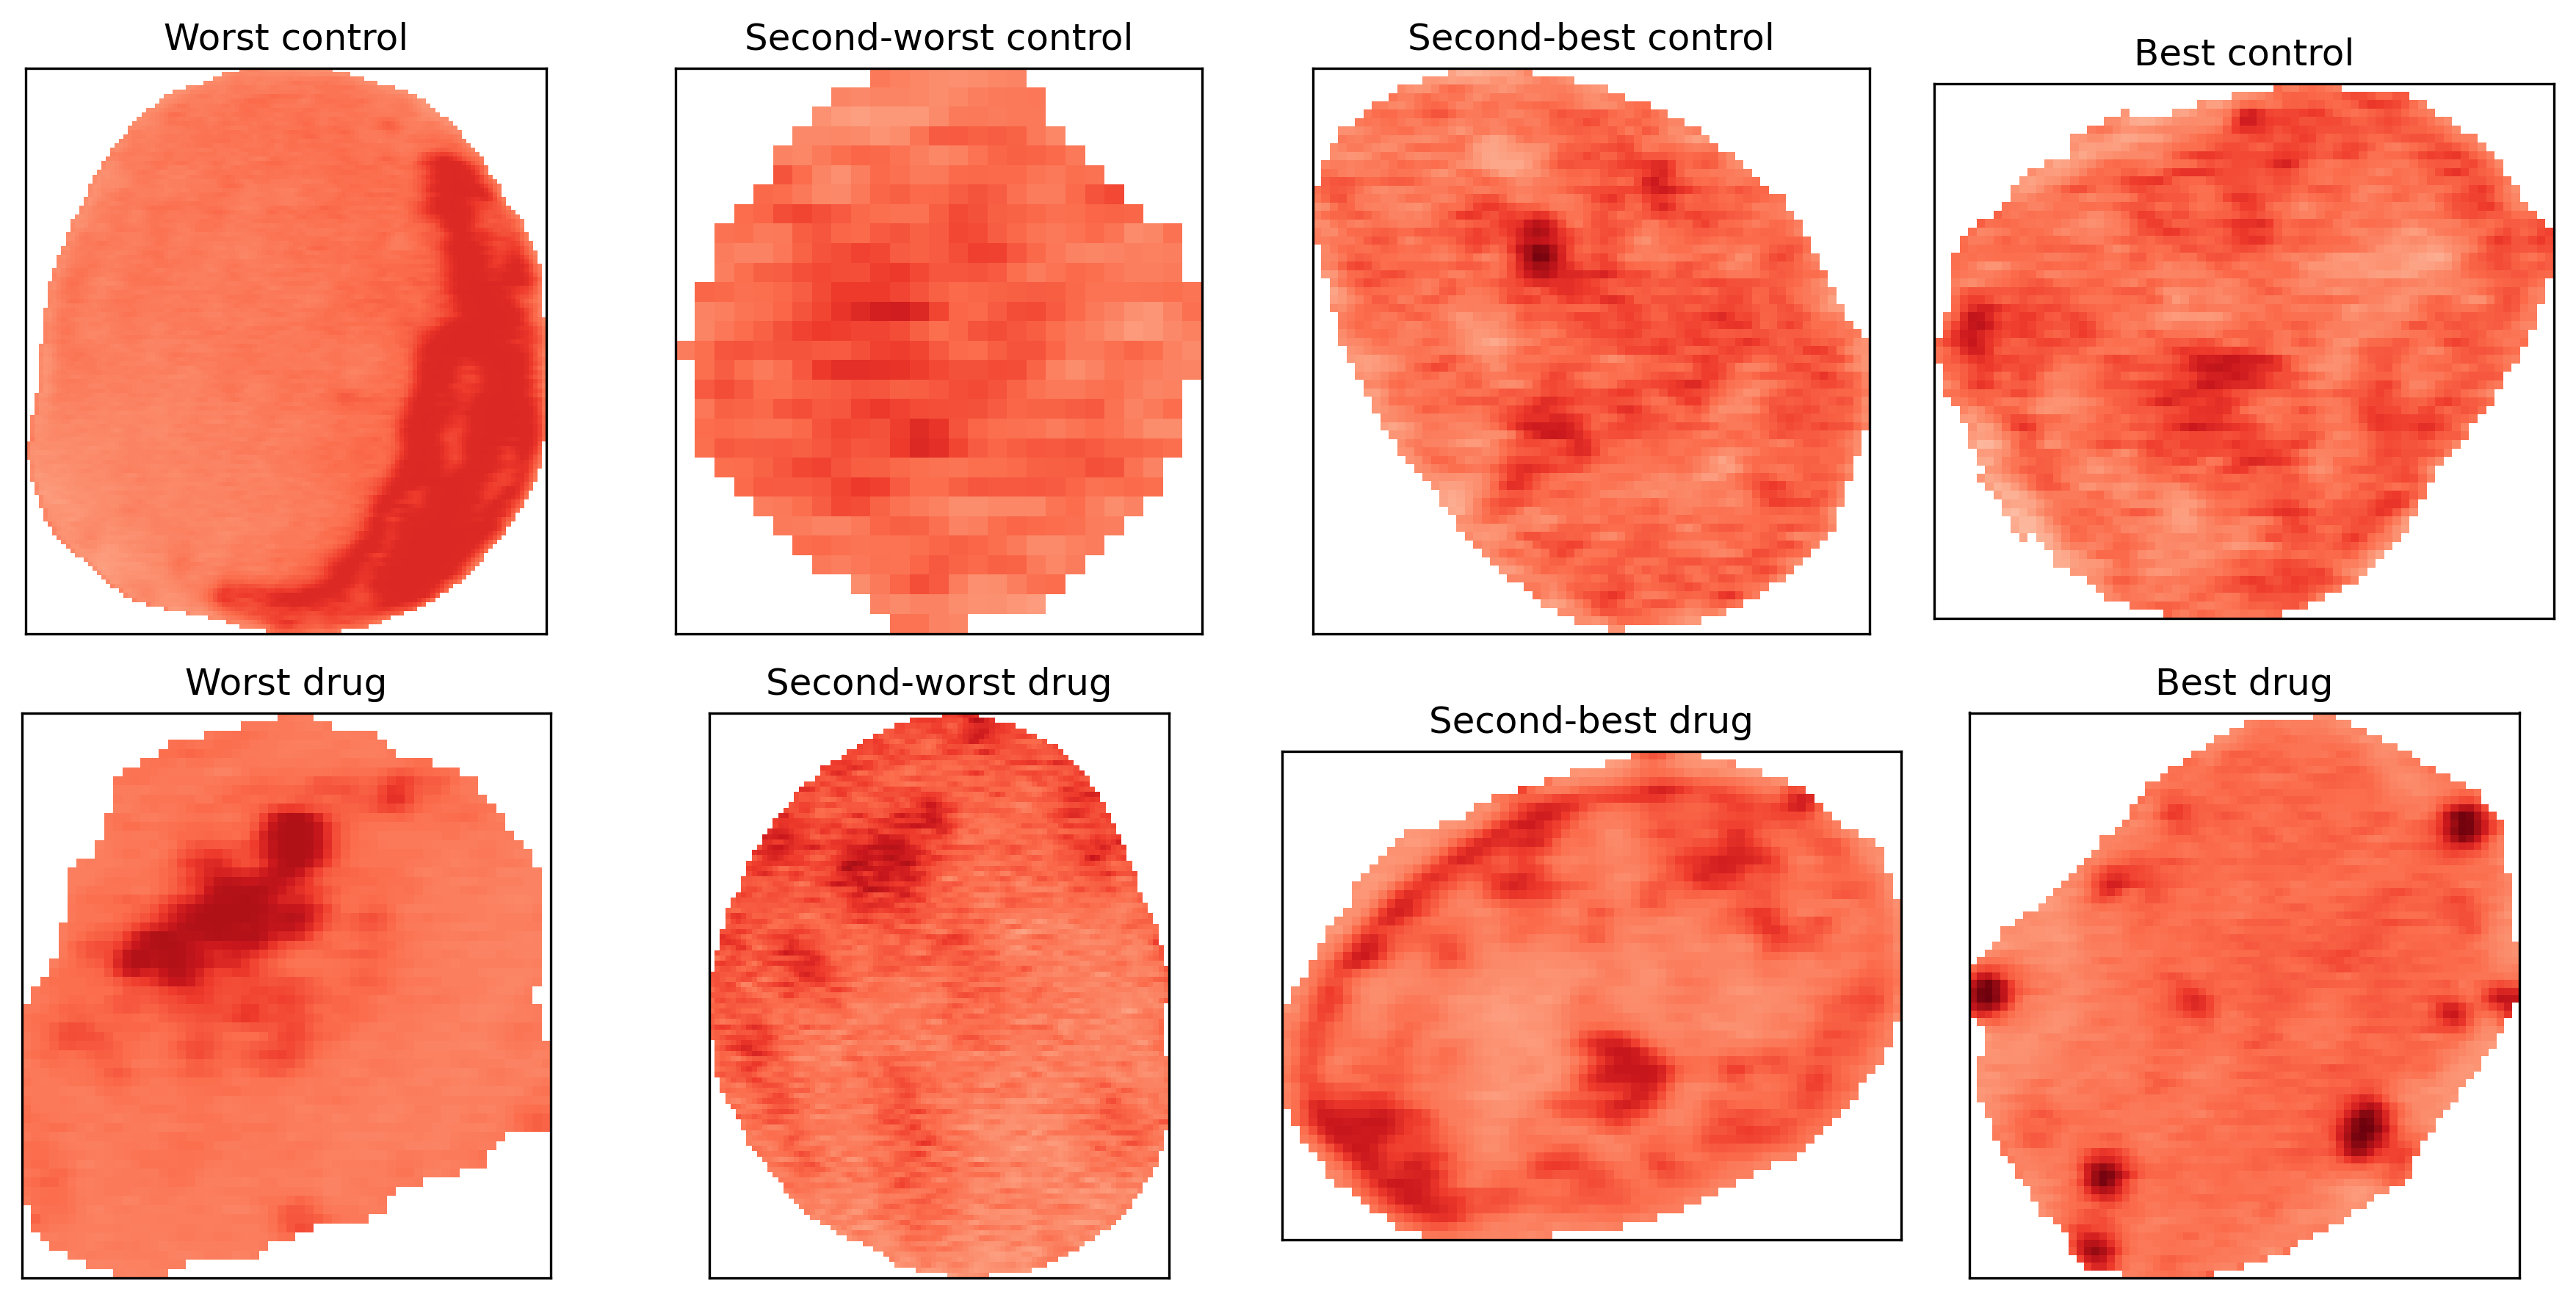

In [6]:
ds.showBestAndWorst(save_to='../figures/best_and_worst.png')

In [6]:
df_unfiltered = ds.makeSelectionKDE(q_control=-1, q_drug=-1)
df_05 = ds.makeSelectionKDE(q_control=0.05, q_drug=0.05)
df_10 = ds.makeSelectionKDE(q_control=0.1, q_drug=0.1)
df_15 = ds.makeSelectionKDE(q_control=0.15, q_drug=0.15)
df_20 = ds.makeSelectionKDE(q_control=0.20, q_drug=0.20)
df_25 = ds.makeSelectionKDE(q_control=0.25, q_drug=0.25)

In [7]:
df_unfiltered.to_csv('feature_data_25/features_00.csv', index=False)
df_05.to_csv('feature_data_25/features_05.csv', index=False)
df_10.to_csv('feature_data_25/features_10.csv', index=False)
df_15.to_csv('feature_data_25/features_15.csv', index=False)
df_20.to_csv('feature_data_25/features_20.csv', index=False)
df_25.to_csv('feature_data_25/features_25.csv', index=False)